In [ ]:
from customLib.betaVAE import get_seq_fullAE, VAE
from customLib.AE import get_sequentials_outer, AE
from customLib.plot_drawer import grid_plot, plot_predictions
import numpy as np

def load_autoencoder() -> AE:

    outer = AE(*get_sequentials_outer())
    outer.set_trainable(False)
    full_autoencoder = VAE(*get_seq_fullAE(outer), latent_dim=2)
    full_autoencoder.build(input_shape=(None, 1800, 1))
    full_autoencoder.load_weights(f"./weights/vae2.h5")

    return full_autoencoder

In [ ]:
autoencoder = load_autoencoder()

def traverse_latent_space(starting_point, steps, step_size, dimension):
    samples = []
    for i in range(steps):
        latent_vector = starting_point.copy()
        latent_vector[dimension] += i * step_size  # Adjust the dimension you want to traverse
        decoded = autoencoder.decoder(latent_vector.reshape(1, 2))
        decoded = np.array(decoded).reshape(1800, )
        samples.append(decoded)
    return np.array(samples)

In [ ]:
traverse = traverse_latent_space(np.array((-3, 0)), 12, 0.5, 0)
plot_predictions(traverse, decoded_data=None)

In [ ]:
traverse = traverse_latent_space(np.array((0, -3)), 12, 0.5, 1)
plot_predictions(traverse, decoded_data=None)

27


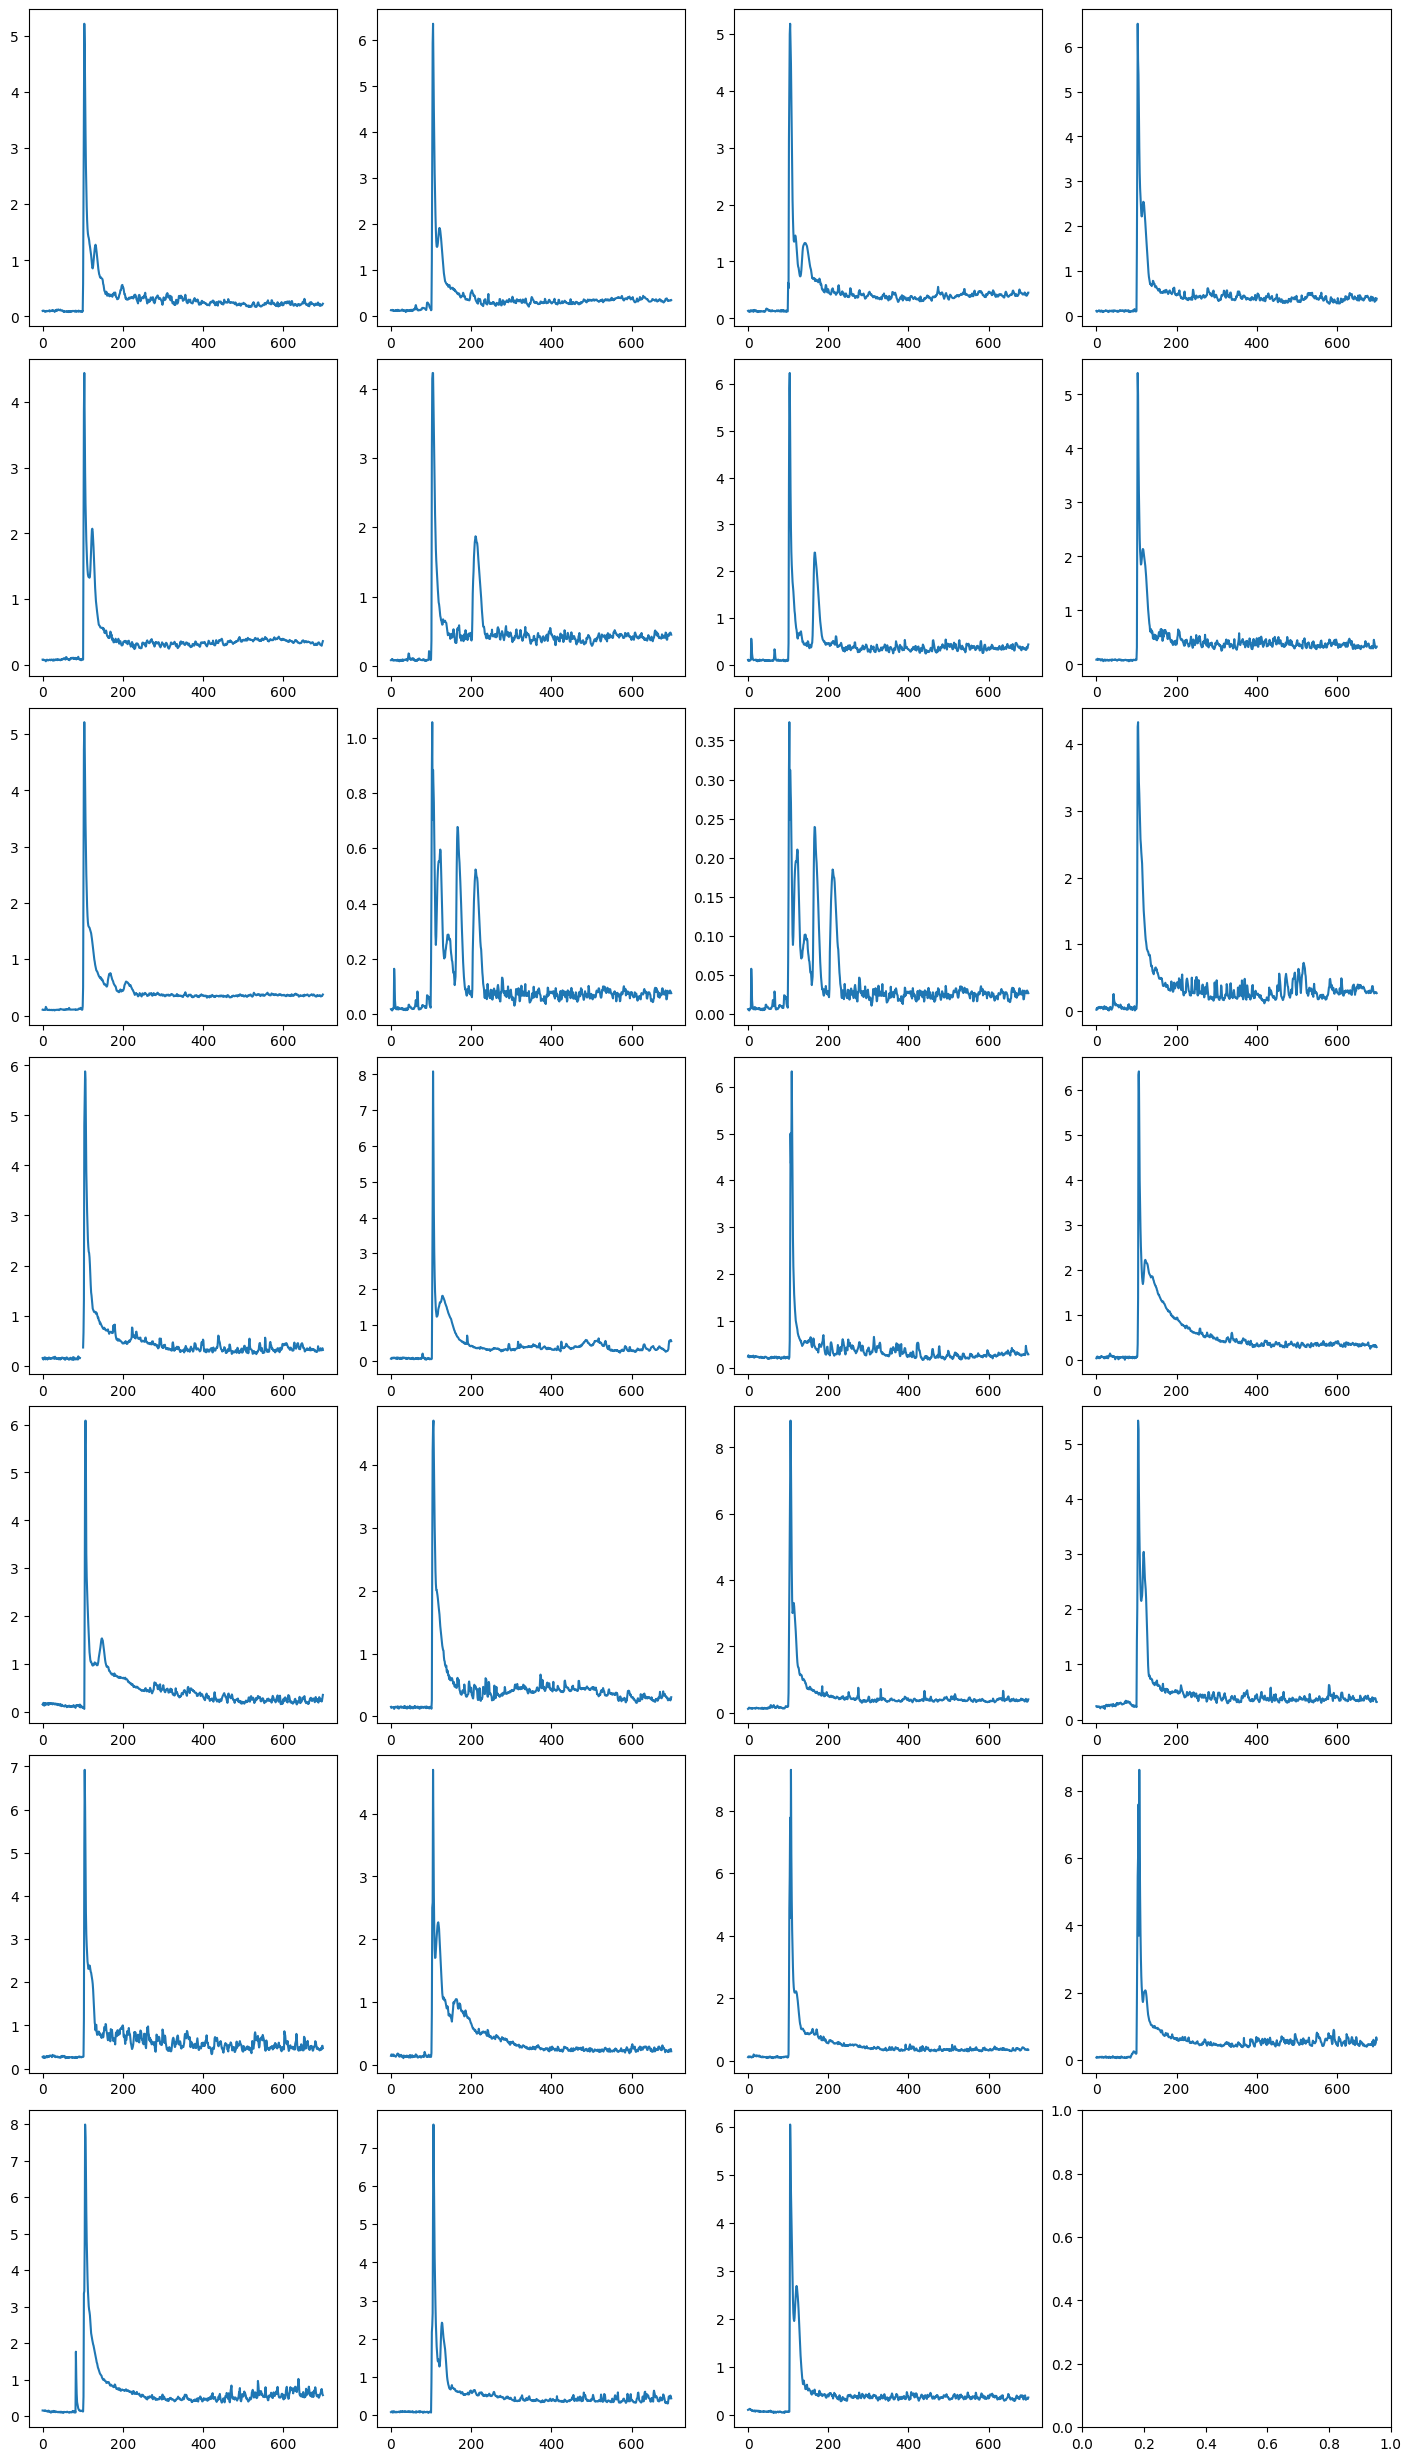

In [1]:
from customLib.data_parser import parser
from customLib.plot_drawer import plot_predictions

physical_data = parser("data/NaCl")

print(len(physical_data))

plot_predictions(physical_data, decoded_data=None)

14


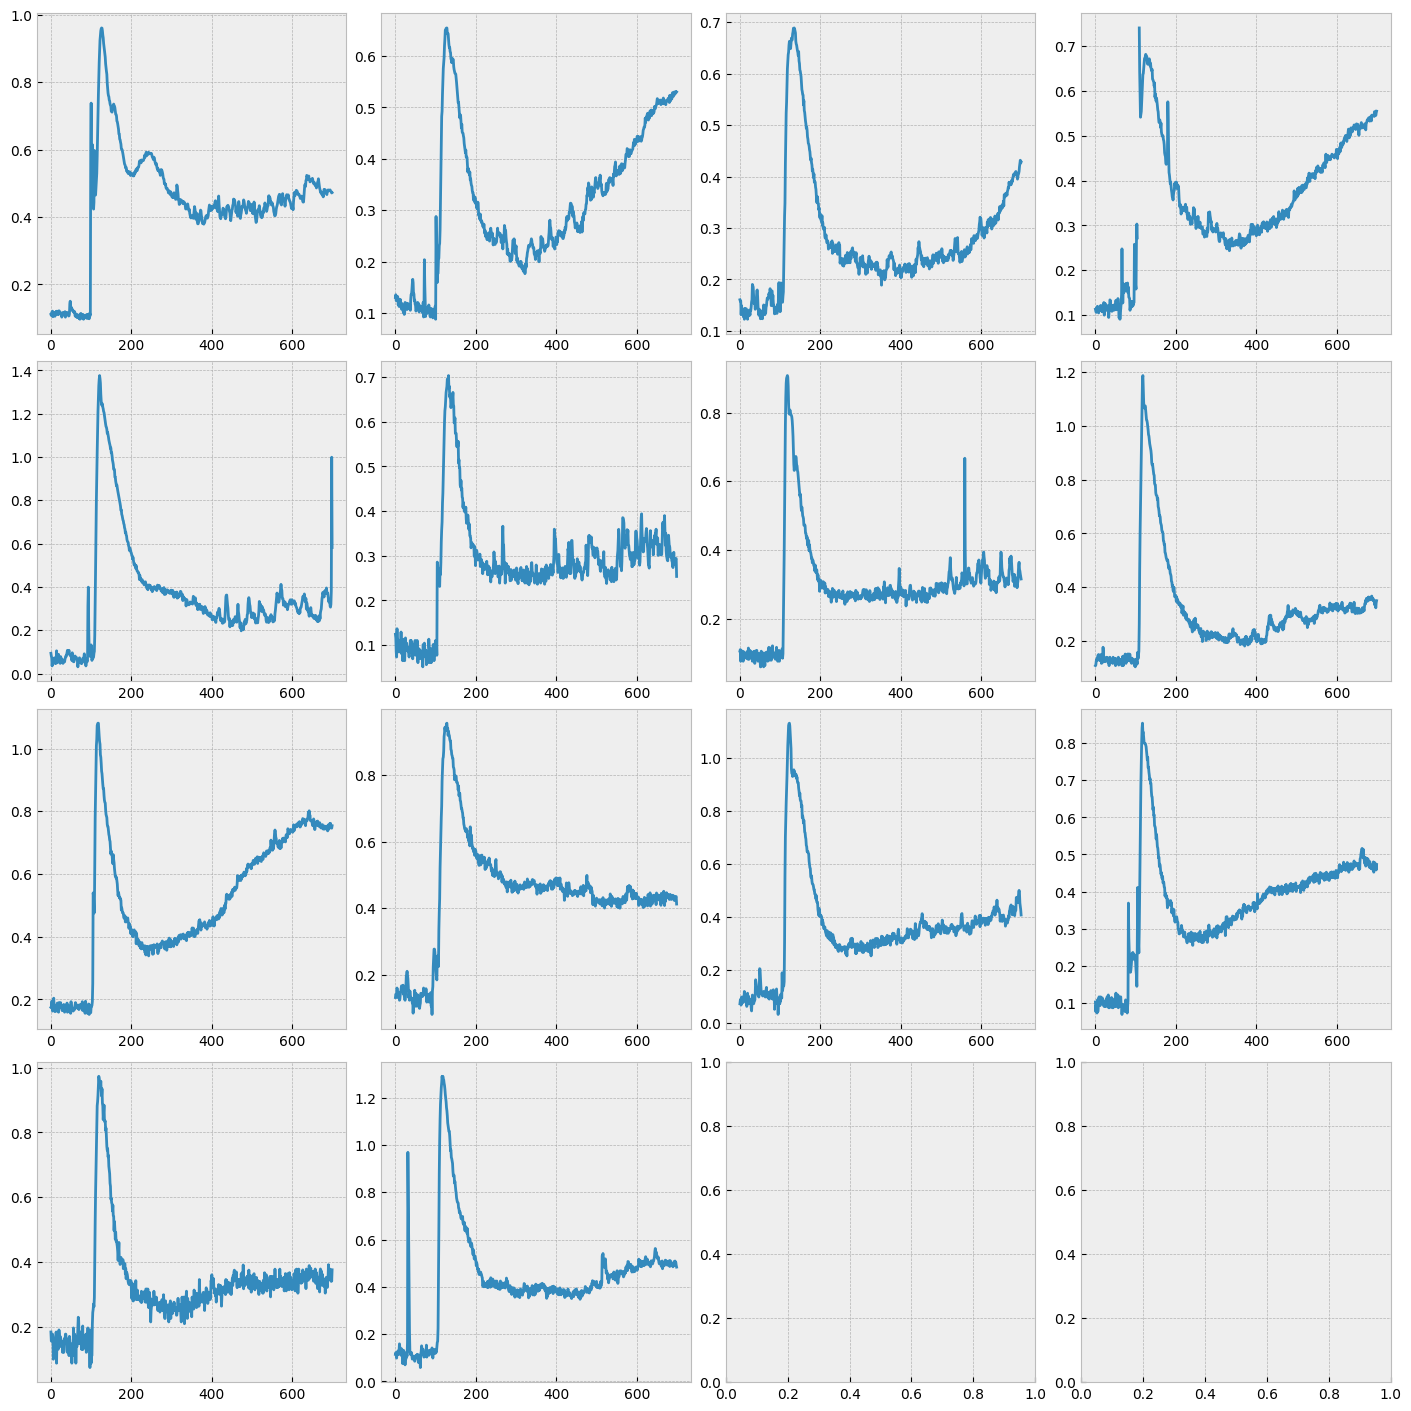

In [4]:
from customLib.data_parser import parser
from customLib.plot_drawer import plot_predictions

physical_data = parser("data/H2O2")
print(len(physical_data))
plot_predictions(physical_data, decoded_data=None)